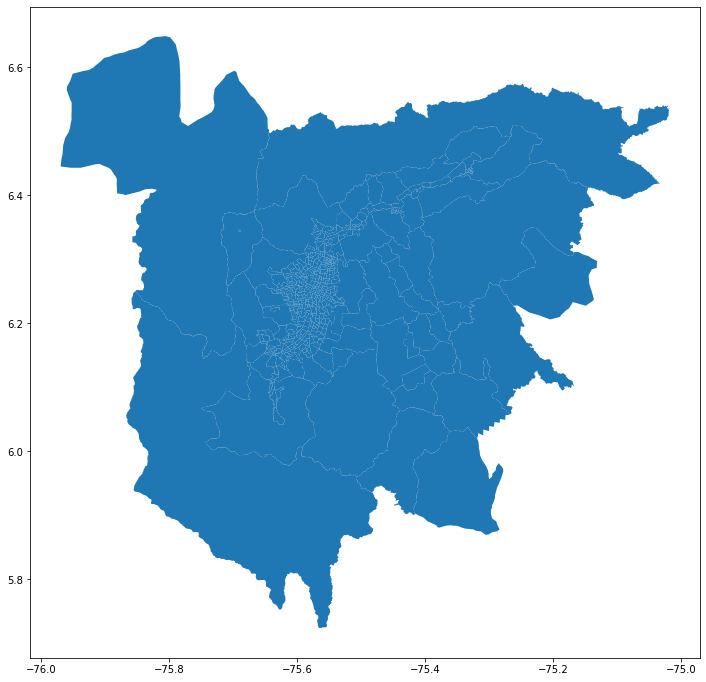

In [4]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from shapely.ops import cascaded_union
from shapely.geometry import Polygon
%matplotlib inline

aburra_valley = gp.read_file("maps/EOD.shp")
# Plotting
aburra_valley.plot(figsize=(12, 12))
plt.show()

In [6]:
print(aburra_valley.head())

  SIT_2017  Ejemplo_EO                                           geometry
0      647         NaN  POLYGON ((-75.38993 6.10673, -75.38991 6.10365...
1      644         0.0  POLYGON ((-75.39157 6.12566, -75.39418 6.12421...
2      645         0.0  POLYGON ((-75.35781 6.16762, -75.35777 6.16758...
3      476         0.0  POLYGON ((-75.40830 6.15828, -75.40832 6.15811...
4      642         0.0  POLYGON ((-75.36046 6.18608, -75.36058 6.18591...


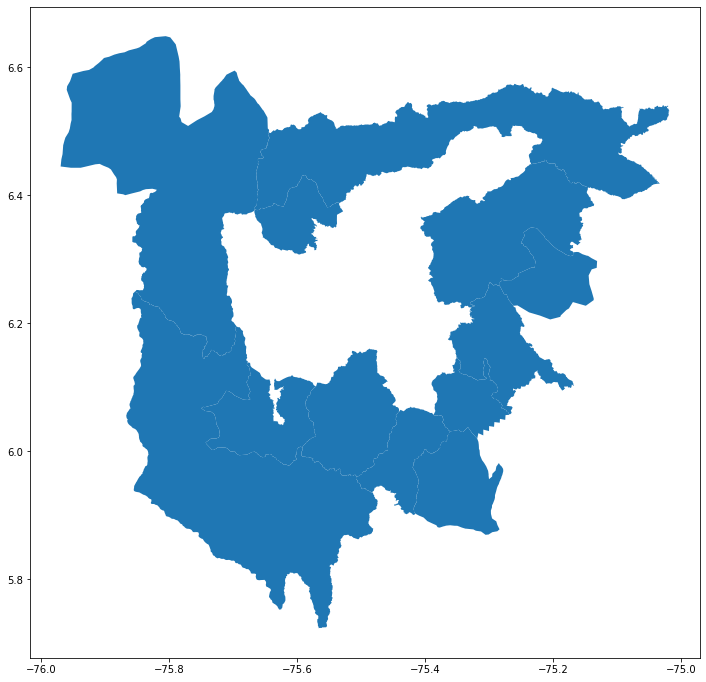

In [14]:
# Reduce small places
to_eliminate = []
for index, row in aburra_valley.iterrows():
    if row['geometry'].area < 5.5e-3:
        to_eliminate.append(index)

aburra_less = aburra_valley.drop(to_eliminate, axis=0)
aburra_less.plot(figsize=(12, 12))
plt.show()

In [15]:
# Create aburra merged
aburra_merged = aburra_less.unary_union

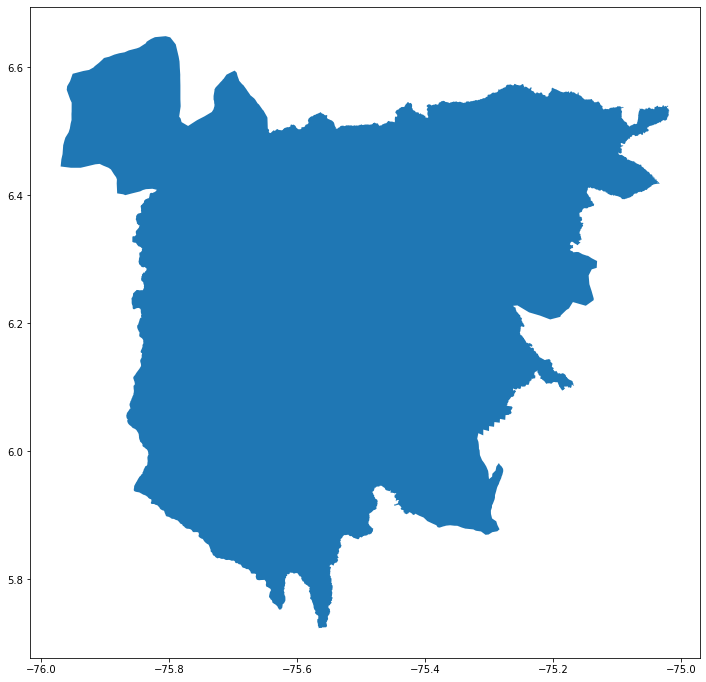

In [34]:
aburra_valley_polygon = list(aburra_merged)[0]
x, y = aburra_valley_polygon.exterior.coords.xy
coord = np.dstack((x, y)).tolist()

plotting = False
if plotting:
    for i in range(len(coord[0]) - 1):
        plt.plot((coord[0][i][0], coord[0][i + 1][0]), (coord[0][i][1], coord[0][i + 1][1]), 'k')

    plt.show()
    
border_valley = gp.GeoSeries(Polygon(coord[0]))
border_valley.plot(figsize=(12, 12))
plt.show()

border_valley.to_file("maps/EOD_border.shp", driver="ESRI Shapefile")